In [21]:
from fastai.vision import *

In [22]:
path = Path('images')

In [23]:
path.ls()

[PosixPath('images/snow'),
 PosixPath('images/sunshine'),
 PosixPath('images/flood'),
 PosixPath('images/rain'),
 PosixPath('images/fog'),
 PosixPath('images/clouds'),
 PosixPath('images/thunderstorm'),
 PosixPath('images/blue_sky'),
 PosixPath('images/sandstorm')]

In [24]:
#download_images(path/'rain.csv', path/'rain', max_pics=200)

In [25]:
classes = ['rain', 'thunderstorm', 
           'snow', 'blue_sky', 'sunshine', 'flood', 'rain', 'fog', 'clouds', 'hail', 'sandstorm']

In [26]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

rain


thunderstorm


snow


blue_sky


sunshine


flood


rain


fog


clouds


hail
sandstorm


In [27]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=12, num_workers=4).normalize(imagenet_stats)

In [28]:
data.classes

['blue_sky',
 'clouds',
 'flood',
 'fog',
 'rain',
 'sandstorm',
 'snow',
 'sunshine',
 'thunderstorm']

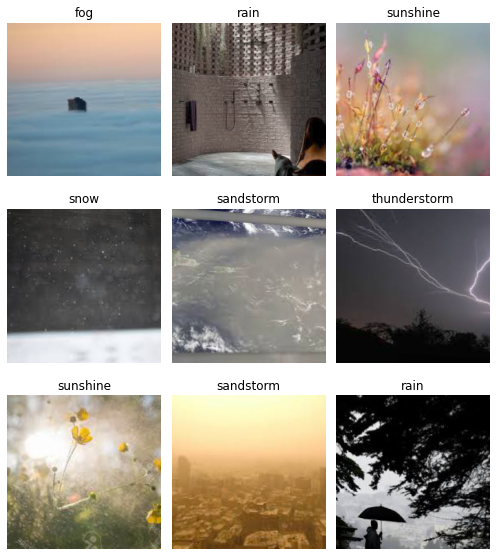

In [29]:
data.show_batch(rows=3, figsize=(7,8))

In [30]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['blue_sky',
  'clouds',
  'flood',
  'fog',
  'rain',
  'sandstorm',
  'snow',
  'sunshine',
  'thunderstorm'],
 9,
 878,
 219)

In [31]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, callback_fns=ShowGraph) 

epoch,train_loss,valid_loss,error_rate,time
0,1.620989,0.854874,0.223744,00:09
1,1.217778,0.756607,0.200913,00:09
2,0.867718,0.555029,0.155251,00:09
3,0.729658,0.517194,0.164384,00:09


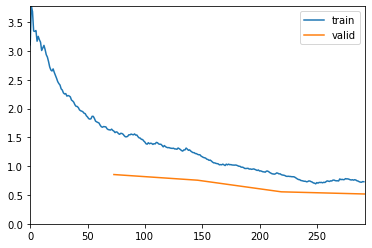

In [32]:
learn.fit_one_cycle(4)

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, callback_fns=ShowGraph) 

epoch,train_loss,valid_loss,error_rate,time
0,2.059513,0.737268,0.251142,00:05
1,1.454425,0.706744,0.191781,00:05
2,1.060141,0.644070,0.205479,00:05
3,0.789640,0.599586,0.205479,00:05


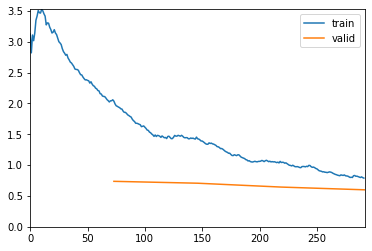

In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.895717,0.704826,0.214612,00:09
1,1.412288,0.882239,0.283105,00:09
2,1.129272,0.635435,0.196347,00:09
3,0.904714,0.523868,0.191781,00:09
4,0.662593,0.464676,0.155251,00:09
5,0.597843,0.410105,0.146119,00:09
6,0.530478,0.421877,0.164384,00:09
7,0.459082,0.415345,0.141553,00:09


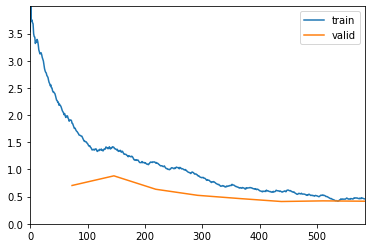

In [35]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, callback_fns=ShowGraph) 
learn.fit_one_cycle(8)

In [36]:
interp = ClassificationInterpretation.from_learner(learn)

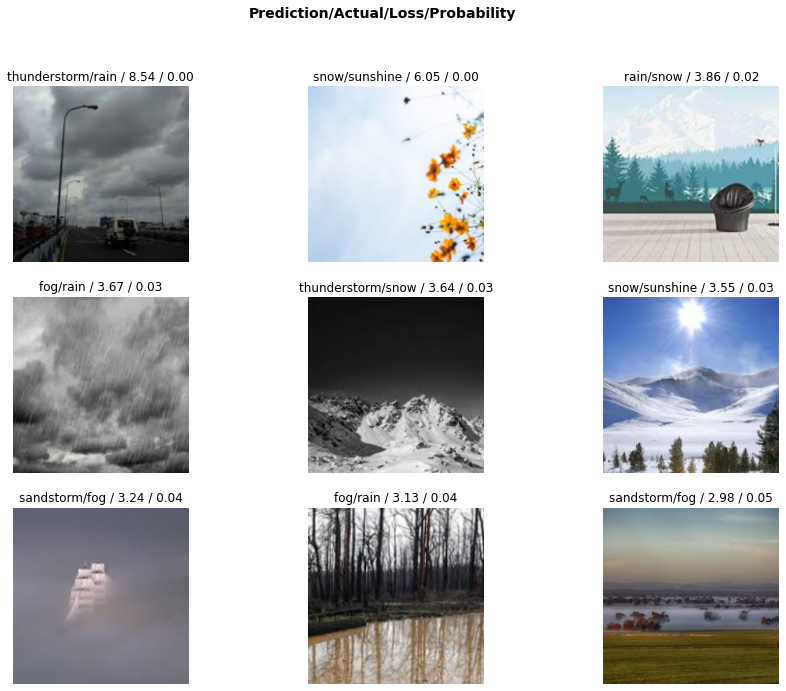

In [37]:
interp.plot_top_losses(9, figsize=(15,11))

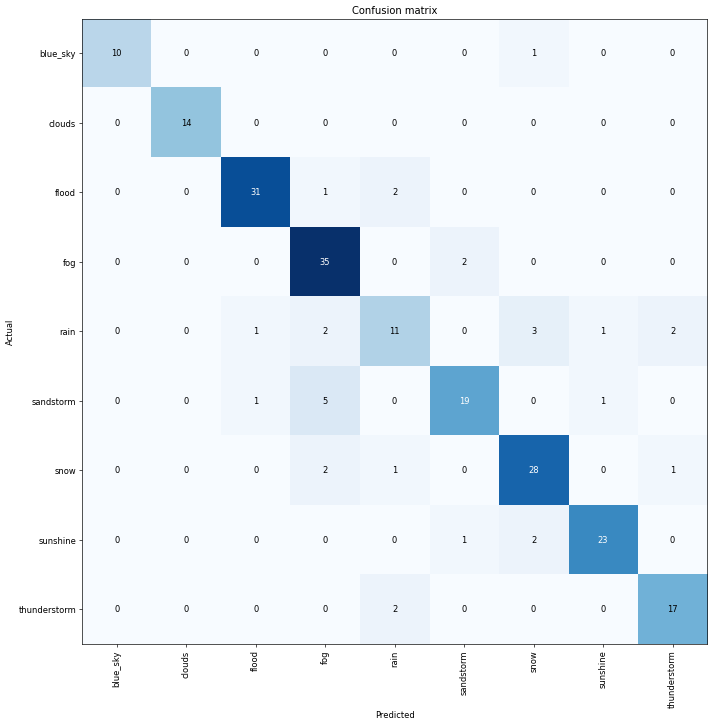

In [38]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [42]:
img = open_image(path/'rain/00000047.jpg')

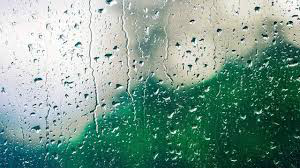

In [43]:
img

In [44]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

'rain'

In [51]:
learn.save('stage-2');

In [52]:
from fastai.widgets import *

In [53]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [55]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate, callback_fns=ShowGraph)

learn_cln.load('stage-2');

In [56]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [57]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())